In [107]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import mixture
from sklearn import linear_model
import scipy as sp
from scipy import linalg
import pandas as pd

import itertools
import matplotlib as mpl

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

In [2]:
data = pd.read_csv('../data/data.csv')
labels = pd.read_csv('../data/labels.csv', squeeze=True, header=None)
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:], labels)

In [84]:
@np.vectorize
def round_of_rating(number):
    """Round a number to the closest half integer.
    >>> round_of_rating(1.3)
    1.5
    >>> round_of_rating(2.6)
    2.5
    >>> round_of_rating(3.0)
    3.0
    >>> round_of_rating(4.1)
    4.0"""
    return round(number * 2) / 2

In [86]:
@np.vectorize
def round_of_rating(number):
    """Round a number to the closest half integer.
    >>> round_of_rating(1.3)
    1.5
    >>> round_of_rating(2.6)
    2.5
    >>> round_of_rating(3.0)
    3.0
    >>> round_of_rating(4.1)
    4.0"""
    return round(number)

# Linear Regression

In [31]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y_hat = round_of_rating(reg.predict(x_test))

In [34]:
error = y_test - y_hat
error[:5]

268     0.5
1361    0.5
241    -0.5
311     0.5
132     0.0
Name: 0, dtype: float64

In [35]:
reg.score(x_test, y_test)

0.059125036396925131

In [37]:
# Most important thing
best_var = np.argmax(abs(reg.coef_))
data.columns[best_var]

'4'

# Logistic Regression

In [38]:
log = linear_model.LogisticRegression()
log.fit(x_train, y_train*2) # by 2 to make them ints

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
log.score(x_test, y_test*2)

0.25418994413407819

In [40]:
y_hat = log.predict(x_test) / 2

In [41]:
error = y_test - y_hat
error[:5]

268     0.5
1361    0.5
241     0.0
311     0.5
132    -0.5
Name: 0, dtype: float64

## Data Projection

In [50]:
model = TSNE(n_components=2)
points = model.fit_transform(data.iloc[:,1:-15])

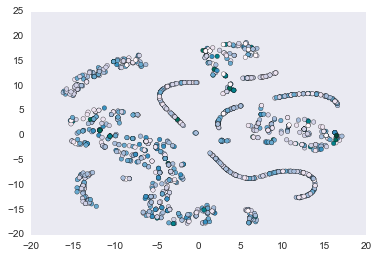

In [51]:
plt.scatter(points[:,0], points[:,1], c=(labels*2)/2, cmap=plt.cm.PuBuGn_r)

In [41]:
pca = PCA(n_components=2)
points = pca.fit_transform(data.iloc[:,1:-15])

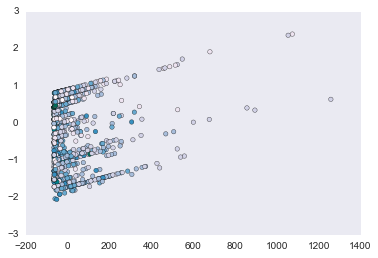

In [48]:
plt.scatter(points[:,0], points[:,1], c=(labels*2)/2, cmap=plt.cm.PuBuGn_r)

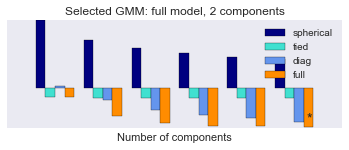

In [60]:
X = data.iloc[:,1:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [62]:
gmm = mixture.GaussianMixture(n_components=5,
                                      covariance_type='full')
gmm.fit(data.iloc[:,1:])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [89]:
y_hat = gmm.predict(x_test)

In [88]:
a = round_of_rating(y_test)

In [124]:
sp.stats.mode(y_hat[a == 4])

ModeResult(mode=array([2]), count=array([77]))

In [118]:
d = {2:1,3:2,}

In [24]:
from health import c2v

IOError: [Errno 2] No such file or directory: 'anaconda/lib/python2.7/site-packages/health/data/code2vec.p'